In [6]:
import pandas as pd
import numpy as np
from pandas_datareader import data 
import matplotlib.pyplot as plt 



In [7]:
# top 20 stockslist
stock_list=['MSFT','AAPL','AMZN','GOOG','GOOGL','FB','JNJ','V','PG','JPM','UNH','MA','INTC','VZ','HD','T','PFE','MRK','PEP']


In [8]:
# getting Adj Close of all stocks

In [10]:
def read_data(ticker):
    stocks.append(data.DataReader(ticker,'yahoo',start='1/1/2010'))
stocks = []
stock=pd.DataFrame()
i=0
for ticker in stock_list:
    read_data(ticker)
    stock[ticker]=stocks[i]['Adj Close']
    i=i+1

In [72]:
# finding all possible combinations of 5 stocks of from 20
from itertools import combinations 
a = list(combinations(stock_list, 5))  
  

In [73]:
# finding a least volatile portfolio consisting of five stocks irrespective of returns(less volatile so stocks are uncorelated)
v=[]
from scipy.optimize import minimize
def get_vol(weights):
    weights = np.array(weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))
    return  vol
def check_sum(weights):
    return np.sum(weights) - 1
cons = ({'type':'eq','fun': check_sum})
bounds = [(0, 1),(0,1),(0,1),(0,1),(0,1)]
init_guess=[0.2,0.2,0.2,0.2,0.2]
for i in range(len(a)):
    x=pd.DataFrame()
    for j in range(5):
        x[a[i][j]]=stock[a[i][j]]
    log_return=np.log(x/x.shift(1))
    oopt_results = minimize( get_vol,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    v.append(get_vol(oopt_results.x))

In [74]:
v=np.array(v)
a[v.argmin()]
print('portfolio with least volatility is', a[v.argmin()],'with weights',oopt_results.x,'respectively ')


portfolio with least volatility is ('AMZN', 'JNJ', 'PG', 'VZ', 'PEP') with weights [0.03061246 0.25393176 0.16743647 0.15093804 0.39708127] respectively 


In [62]:
# calculating effeicient frontier for these stocks

In [75]:
count=100000
x=pd.DataFrame()
for j in range(5):
        x[a[v.argmin()][j]]=stock[a[v.argmin()][j]]
log_return=np.log(x/x.shift(1))
weights_all=np.zeros((count,5))
exp=np.zeros(count)
vol=np.zeros(count)
sharp=np.zeros(count)
for i in range(count):
    weights=np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    weights_all[i]=weights
    exp[i]=np.sum(log_return.mean()*252*weights)
    vol[i]=np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    sharp[i]= exp[i]/vol[i]
    

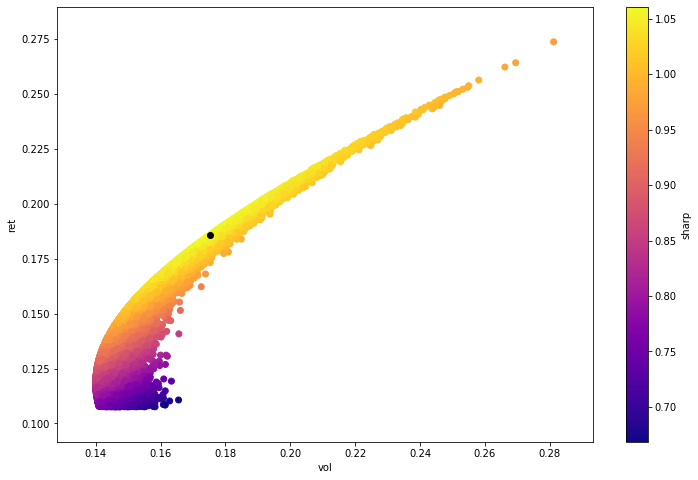

In [77]:
max_ret=exp[  sharp.argmax()]
max_vol=vol[  sharp.argmax()]
weights_all[sharp.argmax()]
plt.figure(figsize=(12,8))
plt.scatter(vol,exp,c=sharp,cmap='plasma')
plt.xlabel('vol')
plt.ylabel('ret')
plt.colorbar(label='sharp')
plt.scatter(max_vol,max_ret,c='black')

In [ ]:
## finding a potfolio  with highest sharpe ratio consisting of five stocks

In [78]:
from scipy.optimize import minimize
s=[]
def get_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))
    sr = ret/vol
    return sr
def neg_sharpe(weights):
    return  get_sr(weights) * -1
def check_sum(weights):
    return np.sum(weights) - 1
cons = ({'type':'eq','fun': check_sum})
bounds = [(0, 1),(0,1),(0,1),(0,1),(0,1)]
init_guess=[0.2,0.2,0.2,0.2,0.2]
for i in range(len(a)):
    x=pd.DataFrame()
    for j in range(5):
        x[a[i][j]]=stock[a[i][j]]
    log_return=np.log(x/x.shift(1))
    oopt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    s.append(get_sr(oopt_results .x))
    
       

In [79]:
s=np.array(s)
a[s.argmax()]
print('portfolio with the highest sharpe ratio is', a[s.argmax()],'with weights',oopt_results.x,'respectively ')

portfolio with the highest sharpe ratio is ('AAPL', 'AMZN', 'UNH', 'VZ', 'HD') with weights [8.47982191e-01 3.08997619e-18 5.09575021e-18 1.09834794e-01
 4.21830151e-02] respectively 


In [ ]:
# calculating effeicient frontier for these stocks

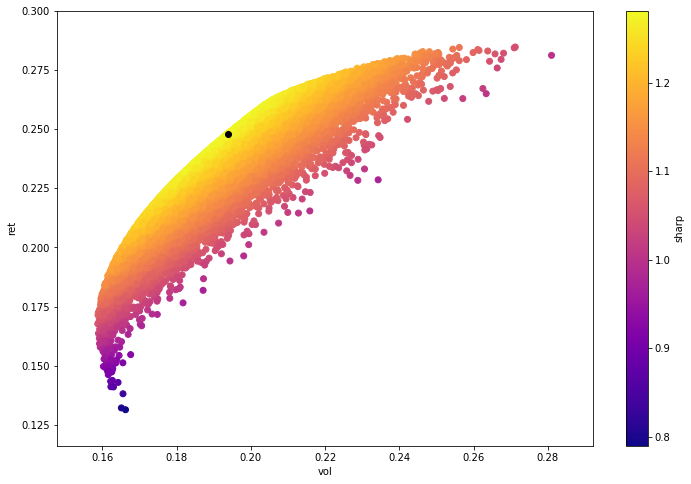

In [80]:
count=100000
x=pd.DataFrame()
for j in range(5):
        x[a[s.argmax()][j]]=stock[a[s.argmax()][j]]
log_return=np.log(x/x.shift(1))
weights_all=np.zeros((count,5))
exp=np.zeros(count)
vol=np.zeros(count)
sharp=np.zeros(count)
for i in range(count):
    weights=np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    weights_all[i]=weights
    exp[i]=np.sum(log_return.mean()*252*weights)
    vol[i]=np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252,weights)))
    sharp[i]= exp[i]/vol[i]
max_ret=exp[  sharp.argmax()]
max_vol=vol[  sharp.argmax()]
weights_all[sharp.argmax()]
plt.figure(figsize=(12,8))
plt.scatter(vol,exp,c=sharp,cmap='plasma')
plt.xlabel('vol')
plt.ylabel('ret')
plt.colorbar(label='sharp')
plt.scatter(max_vol,max_ret,c='black')